In [60]:
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [61]:
from __future__ import division
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

In [62]:
data =pd.read_csv(r"D:\Excel R\Data Science Assignments\Text Mining (NLP)\Elon_musk.csv",error_bad_lines =False ,encoding='latin-1')

In [63]:
data

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [64]:
data =[x.strip() for x in data.Text]
data =[x for x in data if x]

In [65]:
data

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

# data Preprocessing

Removing @ and un wanted dupilcates

Removing the PUNCTUATION MARKS

In [66]:
unc ='''!()-[]{};:'"\,<>./?@#$%^&*_~''';
for i in data:
    if i in punc:
        data = punc.replace(i," ")
#  Replaced all punctuation marks form the tweets data

In [67]:
data

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

Removing the @ in the data

In [68]:
# Removing the @ 
data= str(data)
data=data.replace("@",'')
data =data.replace("tobyliiiiiiiiii","")

In [69]:
data

'[\'kunalb11 I\\x92m an alien\', \'ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?\', \'joerogan Spotify Great interview!\', \'gtera27 Doge is underestimated\', \'teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!\', \'Happy New Year of the Ox! https://t.co/9WFKMYu2oj\', \'Frodo was the underdoge,\\nAll thought he would fail,\\nHimself most of all. https://t.co/zGxJFDzzrM\', \'OwenSparks_ flcnhvy anonyx10 Haha thanks :)\', \'flcnhvy anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.\', \'The most entertaining outcome is the most likely\', \'GiveDirectly Just sent some\', \'Just agree to do Clubhouse with kanyewest\', \'https://t.co/3rWE9uHSTS\', \'geoffkeighley UnrealEngine It\\x92s getting real\', \'Bought some Dogecoin for lil X, so he can be a toddler hodler\', \'JoshManMode He definitely has issues, but the sentencing seems a bit high\', \'freewalletorg Thanks for fix

In [70]:
Removed "https" urls in between the data there are many urls and refrence links in the twitter data

SyntaxError: invalid syntax (<ipython-input-70-6e2d21554f4c>, line 1)

In [71]:
import re
data =re.sub(r'http\S+', '', data)
data

'[\'kunalb11 I\\x92m an alien\', \'ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?\', \'joerogan Spotify Great interview!\', \'gtera27 Doge is underestimated\', \'teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!\', \'Happy New Year of the Ox!  \'Frodo was the underdoge,\\nAll thought he would fail,\\nHimself most of all.  \'OwenSparks_ flcnhvy anonyx10 Haha thanks :)\', \'flcnhvy anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.\', \'The most entertaining outcome is the most likely\', \'GiveDirectly Just sent some\', \'Just agree to do Clubhouse with kanyewest\', \' \'geoffkeighley UnrealEngine It\\x92s getting real\', \'Bought some Dogecoin for lil X, so he can be a toddler hodler\', \'JoshManMode He definitely has issues, but the sentencing seems a bit high\', \'freewalletorg Thanks for fixing\', \'freewalletorg Please unlock my account\', \'AstroJordy <U+0001F923><U

Removed the charecters in betwween ""< >"" there is lot of juntk in betwween the delimiters in the data

In [72]:
import re
data =re.sub('<[^>]+>', ' ', data)
data

'[\'kunalb11 I\\x92m an alien\', \'ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?\', \'joerogan Spotify Great interview!\', \'gtera27 Doge is underestimated\', \'teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!\', \'Happy New Year of the Ox!  \'Frodo was the underdoge,\\nAll thought he would fail,\\nHimself most of all.  \'OwenSparks_ flcnhvy anonyx10 Haha thanks :)\', \'flcnhvy anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.\', \'The most entertaining outcome is the most likely\', \'GiveDirectly Just sent some\', \'Just agree to do Clubhouse with kanyewest\', \' \'geoffkeighley UnrealEngine It\\x92s getting real\', \'Bought some Dogecoin for lil X, so he can be a toddler hodler\', \'JoshManMode He definitely has issues, but the sentencing seems a bit high\', \'freewalletorg Thanks for fixing\', \'freewalletorg Please unlock my account\', \'AstroJordy   \', \'This i

In [73]:
data[0:5000]

"['kunalb11 I\\x92m an alien', 'ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?', 'joerogan Spotify Great interview!', 'gtera27 Doge is underestimated', 'teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!', 'Happy New Year of the Ox!  'Frodo was the underdoge,\\nAll thought he would fail,\\nHimself most of all.  'OwenSparks_ flcnhvy anonyx10 Haha thanks :)', 'flcnhvy anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.', 'The most entertaining outcome is the most likely', 'GiveDirectly Just sent some', 'Just agree to do Clubhouse with kanyewest', ' 'geoffkeighley UnrealEngine It\\x92s getting real', 'Bought some Dogecoin for lil X, so he can be a toddler hodler', 'JoshManMode He definitely has issues, but the sentencing seems a bit high', 'freewalletorg Thanks for fixing', 'freewalletorg Please unlock my account', 'AstroJordy   ', 'This is true power haha  'freewalletorg An

The Above data Contains still some empty spaces if we remove those empty spaces it s hard to decode the text into sentaces because  sent_tokenise works on principle of blank spcaes so we are stopping the pre-processig here.

In [74]:
from nltk import tokenize
tweet_sentances =tokenize.sent_tokenize(data)
tweet_sentances

["['kunalb11 I\\x92m an alien', 'ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.",
 'Have you tried it?',
 "', 'joerogan Spotify Great interview!",
 "', 'gtera27 Doge is underestimated', 'teslacn Congratulations Tesla China for amazing execution last year.",
 'Now on to the next for even more!!',
 "', 'Happy New Year of the Ox!",
 "'Frodo was the underdoge,\\nAll thought he would fail,\\nHimself most of all.",
 "'OwenSparks_ flcnhvy anonyx10 Haha thanks :)', 'flcnhvy anonyx10 Indeed!",
 'Tweets definitely do not represent real-world time allocation.',
 "', 'The most entertaining outcome is the most likely', 'GiveDirectly Just sent some', 'Just agree to do Clubhouse with kanyewest', ' 'geoffkeighley UnrealEngine It\\x92s getting real', 'Bought some Dogecoin for lil X, so he can be a toddler hodler', 'JoshManMode He definitely has issues, but the sentencing seems a bit high', 'freewalletorg Thanks for fixing', 'freewalletorg Please unlock my account', 'AstroJordy   ', 'Thi

In [75]:
sent_df =pd.DataFrame(tweet_sentances,columns =["sentance"])

In [76]:
sent_df

,sentance
0,"['kunalb11 I\x92m an alien', 'ID_AA_Carmack Ra..."
1,Have you tried it?
2,"', 'joerogan Spotify Great interview!"
3,"', 'gtera27 Doge is underestimated', 'teslacn ..."
4,Now on to the next for even more!!
...,...
896,"', 'kenyanwalstreet Not actually a payout, jus..."
897,"It may never pay out, as the stock can\x92t b\..."
898,Details Aug 28.
899,"', 'AI symbiosis while u wait', 'vistacruiser7..."


In [82]:
#sentiment analysis
import nltk
afinn =pd.read_csv(r"D:\Excel R\Data Science Assignments\Text Mining (NLP)\afinn.csv",sep =',',encoding='latin-1')
#affin is a file having both postive words and negtive words with predefined scores


In [90]:
afinn.head(5)

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [92]:
affinity_scores  = afinn.set_index('word')['value'].to_dict()

In [93]:
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [ ]:
calculation of Sentiment using the sent_df and affinity_Scores ;


In [101]:
import spacy
nlp =spacy.load('en_core_web_sm')
sentimennt_lexicon =affinity_scores
def cal_sentiment(text:  str=None):
    sent_score =0;
    if text:
        sentance = nlp(text)
        for  i in sentance:
            sent_score = sent_score +sentimennt_lexicon.get(i.lemma_, 0)
    return sent_score


In [103]:
cal_sentiment(text="symbiosis ")

0

In [105]:
sent_df['Sentiment_value']=sent_df['sentance'].apply(cal_sentiment)

In [111]:
sent_df.head(5)

,sentance,Sentiment_value
0,"['kunalb11 I\x92m an alien', 'ID_AA_Carmack Ra...",0
1,Have you tried it?,0
2,"', 'joerogan Spotify Great interview!",3
3,"', 'gtera27 Doge is underestimated', 'teslacn ...",3
4,Now on to the next for even more!!,0


In [112]:
sent_df['word_count']=sent_df['sentance'].str.split(" ").apply(len)

In [113]:
sent_df.head()

,sentance,Sentiment_value,word_count
0,"['kunalb11 I\x92m an alien', 'ID_AA_Carmack Ra...",0,13
1,Have you tried it?,0,4
2,"', 'joerogan Spotify Great interview!",3,5
3,"', 'gtera27 Doge is underestimated', 'teslacn ...",3,14
4,Now on to the next for even more!!,0,8


In [115]:
sent_df.sort_values(by="Sentiment_value")

,sentance,Sentiment_value,word_count
632,Very ba\x85 'justpaulinelol It\x92s too embar...,-8,62
62,"Also, the road to hell is mostly paved with ba...",-7,11
817,"', 'Cool Model 3 review by iamjamiefoxx 'tesl...",-7,65
897,"It may never pay out, as the stock can\x92t b\...",-4,31
663,"Occasional flights from land are ok, but frequ...",-4,39
...,...,...,...
630,It\x92s\x85 'Teslarati Tesla Germany designed...,13,65
78,"', 'teslaownersSV This is a good one', 'MrBeas...",13,39
102,"', 'Erdayastronaut SpaceX Was also thinking th...",16,95
702,We just haven\x92t observed the\x85 'universa...,17,73


In [121]:
sent_df[sent_df['Sentiment_value']< 0].head()

,sentance,Sentiment_value,word_count
11,"However, if we don\x85 'RationalEtienne Adamk...",-2,40
16,\n\nThat\x92s what you\x92re missing.,-2,4
22,Instructional video.\n 'The people have spoken...,-3,42
45,Would be better to have small fees than no fee...,-2,44
51,"', 'WholeMarsBlog No more stalks.",-1,5


In [122]:
sent_df['Sentiment_value'].describe()

count    901.000000
mean       1.406215
std        2.768739
min       -8.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       22.000000
Name: Sentiment_value, dtype: float64

The average sentiment value of ELon musk tweets are ==> 1.406
the min sentiment value for  Elon musk tweets are ==> -8.000(negitive sentiment)
the max sentiment value for Elon must tweets are ==> 22(highest tweets)

# Visualization of Sentiment Analysis for Elon musk tweets
#Sentiment values VS Word Count

<AxesSubplot:xlabel='Sentiment_value', ylabel='Density'>

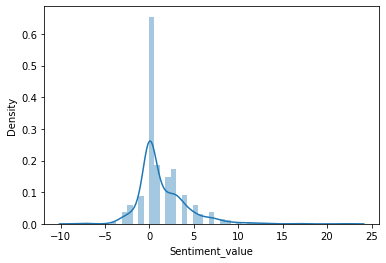

In [127]:
sns.distplot(sent_df["Sentiment_value"])

C:\Users\RaviKiran\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='word_count', ylabel='Density'>

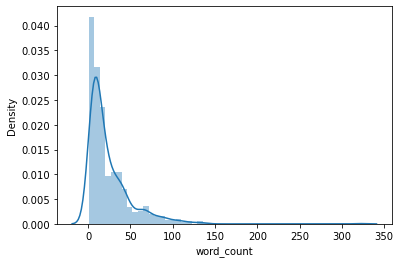

In [128]:
sns.distplot(sent_df["word_count"])

Scattter Plot

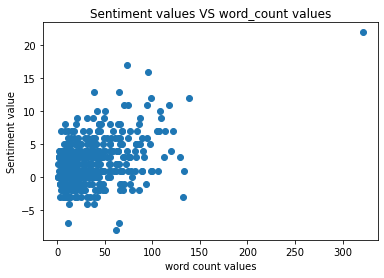

In [133]:
#scatter plot
figsize=(10,10)
plt.xlabel("word count values")
plt.ylabel("Sentiment value")
plt.title("Sentiment values VS word_count values")
plt.scatter(y='Sentiment_value', x='word_count',data=sent_df)

Line Plot

<AxesSubplot:xlabel='word_count', ylabel='Sentiment_value'>

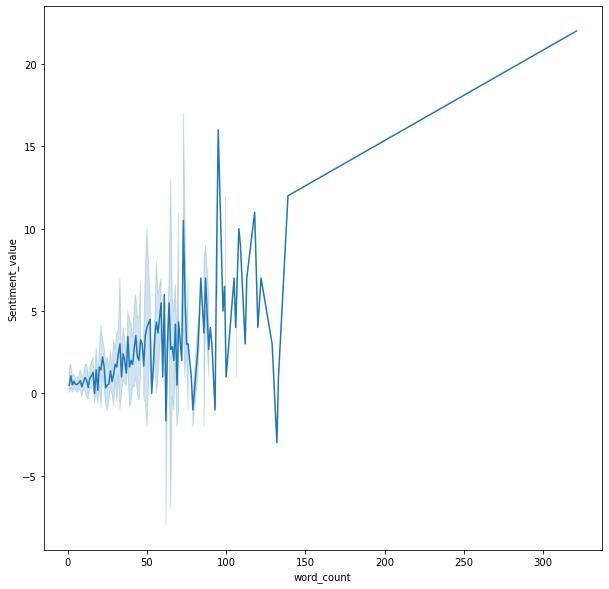

In [130]:
plt.figure(figsize=(10,10))
sns.lineplot(y='Sentiment_value', x='word_count',data=sent_df)